# I - Installing the package

It's as simple as : 

1/ Open terminal

2/ Get to the folder where the file SondeosFinal/Sentiment Analysis/Classifier/ProductionScripts/sondeos-classifier-1.0.0.tar.gz is

3/ Run 'pip install sondeos-classifier-1.0.0.tar.gz'

# II - Usage of the package

Import the module, might takes a few seconds

In [1]:
from classifier import *

Create a classifier from the class SentimentClassifier.

Might takes a few seconds two, because it has to load the model in model/sentiment_pipeline.pkl

In [2]:
clf = SentimentClassifier()

You can now get the prediction of a text, using the predict function of the classifier

In [3]:
x = "Esta muy buena esa pelicula"

print(x + ' ==> %.5f' % clf.predict(x))

Esta muy buena esa pelicula ==> 0.93136


Model is trained so that you should be able to write with repeated letters (commun with the spanish language),

uppercased or lowercased letters, with whatsoever punctuation, and various internet/sms kind of abbrevations/shortcuts

In [4]:
X = ["Son malaaaaa onda esos vecinossss", 'el BIFE estuvo EXCELENTE',
     '!!!! Quien te pensas que sos ??Ahora andate!!y no te quiero ver mas..!',
     'K askoooo', 'te la voy a meter x el culo']

for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

Son malaaaaa onda esos vecinossss ==> 0.22325
el BIFE estuvo EXCELENTE ==> 0.91101
!!!! Quien te pensas que sos ??Ahora andate!!y no te quiero ver mas..! ==> 0.08893
K askoooo ==> 0.01420
te la voy a meter x el culo ==> 0.04589


The model is not sensitive to accents

In [5]:
X = ["Me comí una pared en la cabeza, duele", "me comi una pared en la cabeza, duele"]
for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

Me comí una pared en la cabeza, duele ==> 0.16427
me comi una pared en la cabeza, duele ==> 0.16427


The model won't pay attention to town and countries name. This is important because otherwise it would have a huge bias since an important part of the comments are extracted from tripadvisor and thus town/country words might have a good/bad score
instead of neutral.

In [6]:
X = ['Paris es una mierda', 'Buenos aires es una mierda', 'Nunca iré en quilmes me dijeron que la zona sur es peligrosa',
     'Paraguay es un pais maravilloso','Espana es un pais maravilloso', 'Chile es una poronga',
     'Los de Francia tienen buen olor', 'Los de Argentina tienen mal olor']

for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

Paris es una mierda ==> 0.04911
Buenos aires es una mierda ==> 0.04911
Nunca iré en quilmes me dijeron que la zona sur es peligrosa ==> 0.25738
Paraguay es un pais maravilloso ==> 0.93276
Espana es un pais maravilloso ==> 0.93276
Chile es una poronga ==> 0.15804
Los de Francia tienen buen olor ==> 0.58273
Los de Argentina tienen mal olor ==> 0.20130


Also, a list of around 100 most common verbs is used to factorize verbs amond comments. For example :

In [7]:
X = ['Soy un boludo', 'Es un boludo', 'Eres un boludo']

for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

Soy un boludo ==> 0.07586
Es un boludo ==> 0.07586
Eres un boludo ==> 0.07586


A custom choice is implemented before the prediction : If the sentence has a 'pero', two scores are calculated on the parts
that come before and after the 'pero', and an adaptative barycenter of the two scores is calculted so that the final score
will get the same polarity as the second part of the sentence, but taking into account the the score of the first part.

This allows to catch nuances in the sentence, if it starts saying something positive but concludes saying something negative
the overall polarity should be negative, but contrasted by how positive was the first part. Examples :

In [8]:
X = ['No me gusto la pelicula',
    'Los actores son buenos, pero no me gusto la pelicula igual',
     'Me gusto la pelicula',
     'El actor es malo, pero me gusto la pelicula igual']
for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

No me gusto la pelicula ==> 0.25541
Los actores son buenos, pero no me gusto la pelicula igual ==> 0.49656
Me gusto la pelicula ==> 0.74060
El actor es malo, pero me gusto la pelicula igual ==> 0.52839


A similar thing is done to process comments that present amplification terms 'muy', 're', etc, so that the overall polarity
is the polarity of the verb or adjective concerned by the amplification term

In [9]:
X = ['Esa tienda es recomendable', 'Esta tienda es muy recomendable']

for e in X:
    print(e + ' ==> %.5f' % clf.predict(e))

Esa tienda es recomendable ==> 0.56918
Esta tienda es muy recomendable ==> 0.73411


The model is also trained to understand negation, no, sin, nunca, jamas, ni

In [10]:
X = ['Me gusto la pelicula' ,'Es gente buena',
     'Estuvo interesante hablar con usted',
     'lo recomiendo', 'me aburri un monton',
     'Me quede muy contento!','Saludar con una sonrisa!',
     'Es una persona que saluda a la gente cuando se cruza','Que rica que estuvo la comida!']     
Y = ['no me gusto la pelicula', 'no es gente buena',
     'no me interesa hablar con vos',
     'no lo recomiendo', 'no te podes aburrir con esa serie',
    'nunca estas contento', 'siempre saluda sin sonreir',
     'y a mi, ni me saludo', 'la comida jamas es rica']


print(' ')
print(' '.join([''] * 20) + 'DIRECTOS' + ' '.join([''] * 60) + 'NEGATIVOS')
print(' ')
for e,f in list(zip(X,Y)):
    toPrint1 = e + ' ==>  %.5f' % clf.predict(e)
    toPrint2 = f + ' ==>  %.5f' % clf.predict(f)
    print(toPrint1 + ' '.join([''] * (80-len(toPrint1))) + toPrint2)

 
                   DIRECTOS                                                           NEGATIVOS
 
Me gusto la pelicula ==>  0.74060                                              no me gusto la pelicula ==>  0.25541
Es gente buena ==>  0.85803                                                    no es gente buena ==>  0.33116
Estuvo interesante hablar con usted ==>  0.72379                               no me interesa hablar con vos ==>  0.06870
lo recomiendo ==>  0.73870                                                     no lo recomiendo ==>  0.04422
me aburri un monton ==>  0.00940                                               no te podes aburrir con esa serie ==>  0.82862
Me quede muy contento! ==>  0.91250                                            nunca estas contento ==>  0.23762
Saludar con una sonrisa! ==>  0.61671                                          siempre saluda sin sonreir ==>  0.48202
Es una persona que saluda a la gente cuando se cruza ==>  0.71278              y a mi

The model is trained with many argentine expressions, so it should understand 'la puteada portena'

In [14]:
X = ['Andate a cagar hdp', 'Chupenme la', 'Pelotudos del orto',
    'Chorros de mierda', 'Vos sos gil o que', 'tarado callate', 
    'Me cago en la concha de tu hermana', 'La puta que lo pario',
    'la concha de la lora, te voy a matar', 'ni enpedo votaré para amalia granata', 
    'esos chicos son tarados completos', 'la recalcada puta que lo pario',
    'hijo de mil putas', 'es una porkeria', 'que quilombo', 'Una verdadera choteada',
    'Vos decis pelotudeces todo el tiempo', 'vinimos al re pedo', 'ese pibe es muy cagon',
    'dale no seas rata', 'te juro que me estas hinchando las pelotas', 'no me rompes el orto', 
    'esa situacion es imbancable', 'la verdad que no doy mas de vos', 'estoy harto de tu mala onda',
    'sos un forro', 'para de mandarte cagadas asi', 'me estas cagando ???']

Y = ['Que piola che', 'Ese viaje es barbaro', 'Un chico muy copado!!',
    'Buenisima la atencion', 'La posta que estuvo espectacular la comida',
    'Es una ciudad muy buena onda', 'No te podes aburrir con ellos!',
     'Excelente, nada que decir', 'Reeeeee recomiendo esa pelicula',
    'Todo estuvo perfecto', 'El bife de lomo riquisimo', 'Me enamoré de esos paisajes',
    'Vamooo Argentina!!', 'Me quedé muy contento', 'El precio es honesto',
    'Ese hotel tenia todo para satisfechar', 'Muy bomba la pasamos', 'Los apoyo con todo mi ser',
    'confio totalmente en esa persona', 'Es el mejor dia de mi vida creo', '100% recomendable',
    'Volvimos satisfechos', 'Comimos como diez personas', 'Vos sos lo mas',
    'me hizo reir un monton', 'fue un placer conocerlos', 'Con mucho gusto volveria',
    'Es una obra maestra !!']

print(' ')
print(' '.join([''] * 20) + 'MALOS' + ' '.join([''] * 60) + 'BUENOS')
print(' ')
for e,f in list(zip(X,Y)):
    toPrint1 = e + ' ==>  %.5f' % clf.predict(e)
    toPrint2 = f + ' ==>  %.5f' % clf.predict(f)
    print(toPrint1 + ' '.join([''] * (60-len(toPrint1))) + toPrint2)

 
                   MALOS                                                           BUENOS
 
Andate a cagar hdp ==>  0.01768                            Que piola che ==>  0.61599
Chupenme la ==>  0.00517                                   Ese viaje es barbaro ==>  0.90828
Pelotudos del orto ==>  0.00761                            Un chico muy copado!! ==>  0.83341
Chorros de mierda ==>  0.00834                             Buenisima la atencion ==>  0.95254
Vos sos gil o que ==>  0.07238                             La posta que estuvo espectacular la comida ==>  0.86124
tarado callate ==>  0.06949                                Es una ciudad muy buena onda ==>  0.96940
Me cago en la concha de tu hermana ==>  0.00637            No te podes aburrir con ellos! ==>  0.72462
La puta que lo pario ==>  0.01347                          Excelente, nada que decir ==>  0.71844
la concha de la lora, te voy a matar ==>  0.00718          Reeeeee recomiendo esa pelicula ==>  0.73870
ni enpedo votaré p

And to finish with : 

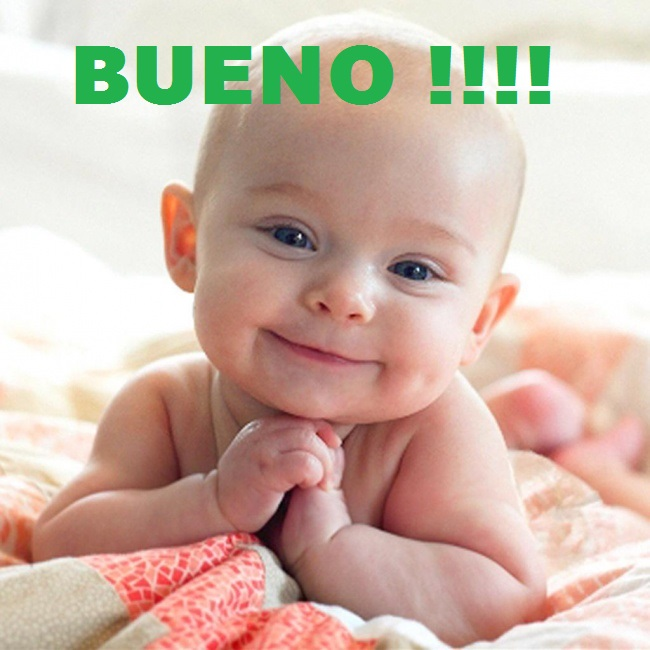

0.70163506915310103

In [12]:
X = """Muchas gracias chicos, espero que esten satisfechos con los proyectos del chatbot y del classifier de sentimientos, yo
     la he pasado genial con ustedes y me encanto la pasantia. Gracias a lio por permitirme trabajar con ustedes, a Bastian por 
     su ayuda sobre las dificultades tecnicas de gestion de los datos, a Ceci por presentarme a los RRHH, y de manera general a 
     todo el equipo de Sondeos por su buena onda. Abrazos!!"""

clf.predict(X, funny=True)

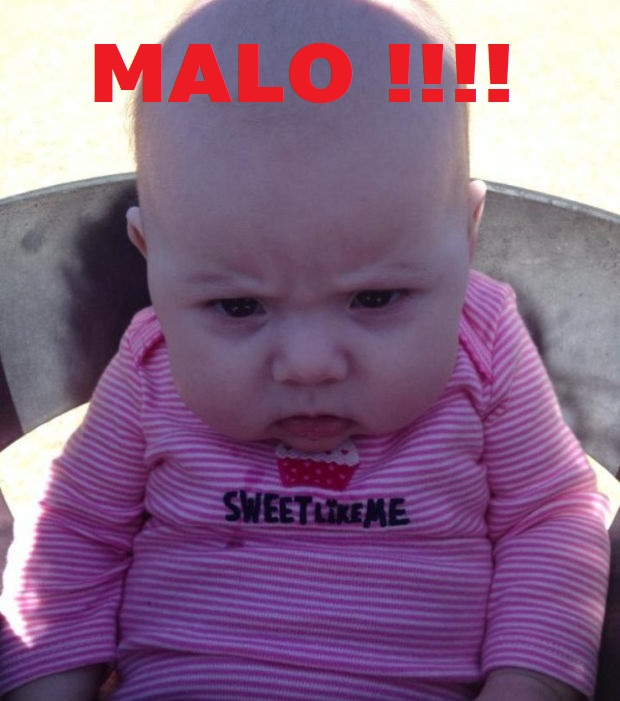

0.18273962075824901

In [13]:
Y = 'Los voy extranar :('

clf.predict(Y, funny=True)